# Caso Práctico: Clasificación de imágenes

## 1. Conjunto de datos

In [6]:
from tensorflow.keras import datasets

2025-12-23 13:30:47.234797: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [7]:
fashion_mnist = datasets.fashion_mnist #datos de ropa

In [8]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() #carga datos de ropa en entrenamiento y test

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


## 2. Visualización del conjunto de datos

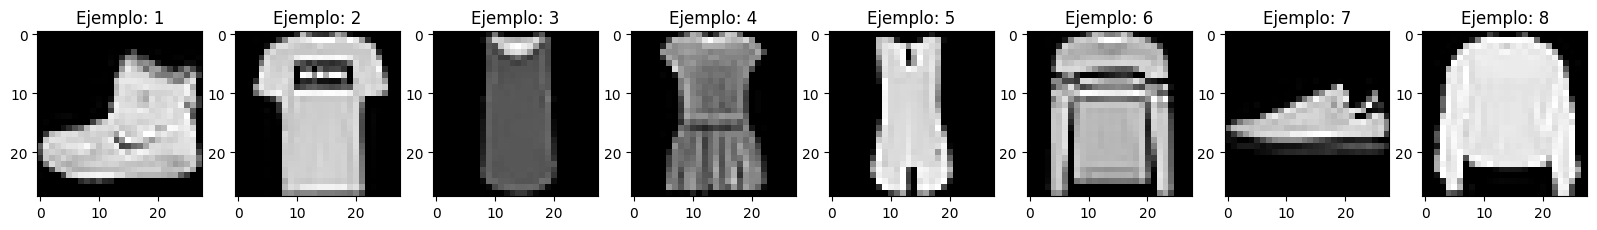

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4)) #conjunto de subplots o imagenes más pequeñas
for index, img in zip(range(1, 9), X_train[:8]):
    plt.subplot(1, 8, index) #index: 1,2,3,4,...
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

In [12]:
print("Longitud subconjunto de entrenamiento: ", len(X_train))
print("Longitud subconjunto de pruebas: ", len(X_test))

Longitud subconjunto de entrenamiento:  60000
Longitud subconjunto de pruebas:  10000


## 3. Transformación del conjunto de datos

In [13]:
X_train_prep = X_train.reshape((60000, 28*28))
X_test_prep = X_test.reshape((10000, 28*28))

In [14]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()
X_train_prep = transformer.fit_transform(X_train_prep)
X_test_prep = transformer.transform(X_test_prep)

In [15]:
from tensorflow.keras.utils import to_categorical
y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)

## 4. Construcción del modelo

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
network.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy', 'Precision'])

In [18]:
history = network.fit(X_train_prep, 
                      y_train_prep,
                      batch_size=32,
                      epochs=15, 
                      validation_data=(X_test_prep, y_test_prep))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - Precision: 0.8675 - accuracy: 0.8116 - loss: 0.5203 - val_Precision: 0.8804 - val_accuracy: 0.8452 - val_loss: 0.4268
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - Precision: 0.8911 - accuracy: 0.8661 - loss: 0.3678 - val_Precision: 0.8780 - val_accuracy: 0.8507 - val_loss: 0.4057
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - Precision: 0.9017 - accuracy: 0.8786 - loss: 0.3285 - val_Precision: 0.8923 - val_accuracy: 0.8734 - val_loss: 0.3566
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - Precision: 0.9073 - accuracy: 0.8880 - loss: 0.3041 - val_Precision: 0.8879 - val_accuracy: 0.8683 - val_loss: 0.3718
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - Precision: 0.9094 - accuracy: 0.8917 - loss: 0.2859 - val_Precision: 0.8964 - val_accuracy: 0.8792 - val_loss: 0.3396
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - Precision: 0.9161 - accuracy: 0.8997 - loss: 0.2700 - val_Precision: